$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# NumPy quickstart

<div class="currentmodule">

numpy

</div>

In [1]:
import numpy as np 
import sys

## Prerequisites

You'll need to know a bit of Python. For a refresher, see the [Python
tutorial](https://docs.python.org/tutorial/).

To work the examples, you'll need `matplotlib` installed in addition to
NumPy.

**Learner profile**

This is a quick overview of arrays in NumPy. It demonstrates how
n-dimensional ($n>=2$) arrays are represented and can be manipulated. In
particular, if you don't know how to apply common functions to
n-dimensional arrays (without using for-loops), or if you want to
understand axis and shape properties for n-dimensional arrays, this
article might be of help.

**Learning Objectives**

After reading, you should be able to:

-   Understand the difference between one-, two- and n-dimensional
    arrays in NumPy;
-   Understand how to apply some linear algebra operations to
    n-dimensional arrays without using for-loops;
-   Understand axis and shape properties for n-dimensional arrays.

## The Basics

NumPy's main object is the homogeneous multidimensional array. It is a
table of elements (usually numbers), all of the same type, indexed by a
tuple of non-negative integers. In NumPy dimensions are called *axes*.

For example, the coordinates of a point in 3D space `[1, 2, 1]` has one
axis. That axis has 3 elements in it, so we say it has a length of 3. In
the example pictured below, the array has 2 axes. The first axis has a
length of 2, the second axis has a length of 3.

In [2]:
[[1., 0., 0.],
 [0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

NumPy's array class is called `ndarray`. It is also known by the alias
`array`. Note that `numpy.array` is not the same as the Standard Python
Library class `array.array`, which only handles one-dimensional arrays
and offers less functionality. The more important attributes of an
`ndarray` object are:

ndarray.ndim  
the number of axes (dimensions) of the array.

ndarray.shape  
the dimensions of the array. This is a tuple of integers indicating the
size of the array in each dimension. For a matrix with *n* rows and *m*
columns, `shape` will be `(n,m)`. The length of the `shape` tuple is
therefore the number of axes, `ndim`.

ndarray.size  
the total number of elements of the array. This is equal to the product
of the elements of `shape`.

ndarray.dtype  
an object describing the type of the elements in the array. One can
create or specify dtype's using standard Python types. Additionally
NumPy provides types of its own. numpy.int32, numpy.int16, and
numpy.float64 are some examples.

ndarray.itemsize  
the size in bytes of each element of the array. For example, an array of
elements of type `float64` has `itemsize` 8 (=64/8), while one of type
`complex32` has `itemsize` 4 (=32/8). It is equivalent to
`ndarray.dtype.itemsize`.

ndarray.data  
the buffer containing the actual elements of the array. Normally, we
won't need to use this attribute because we will access the elements in
an array using indexing facilities.

### An example

In [3]:
import numpy as np 
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [4]:
a.shape 

(3, 5)

In [5]:
a.ndim 

2

In [6]:
a.dtype.name

'int64'

In [7]:
a.itemsize

8

In [8]:
a.size 

15

In [9]:
type(a)

numpy.ndarray

### Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple
using the `array` function. The type of the resulting array is deduced
from the type of the elements in the sequences.

In [10]:
import numpy as np
a = np.array([2, 3, 4])
a

array([2, 3, 4])

In [11]:
a.dtype

dtype('int64')

In [12]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

A frequent error consists in calling `array` with multiple arguments,
rather than providing a single sequence as an argument.

In [13]:
a = np.array(1, 2, 3, 4)    # WRONG

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [14]:
a = np.array([1, 2, 3, 4])  # RIGHT

`array` transforms sequences of sequences into two-dimensional arrays,
sequences of sequences of sequences into three-dimensional arrays, and
so on.

In [15]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The type of the array can also be explicitly specified at creation time:

In [16]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Often, the elements of an array are originally unknown, but its size is
known. Hence, NumPy offers several functions to create arrays with
initial placeholder content. These minimize the necessity of growing
arrays, an expensive operation.

The function `zeros` creates an array full of zeros, the function `ones`
creates an array full of ones, and the function `empty` creates an array
whose initial content is random and depends on the state of the memory.
By default, the dtype of the created array is `float64`, but it can be
specified via the key word argument `dtype`.

In [17]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [19]:
np.empty((2, 3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

To create sequences of numbers, NumPy provides the `arange` function
which is analogous to the Python built-in `range`, but returns an array.

In [20]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [21]:
np.arange(0, 2, 0.3)  # it accepts float arguments

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When `arange` is used with floating point arguments, it is generally not
possible to predict the number of elements obtained, due to the finite
floating point precision. For this reason, it is usually better to use
the function `linspace` that receives as an argument the number of
elements that we want, instead of the step:

In [22]:
from numpy import pi
np.linspace(0, 2, 9)                   # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [23]:
x = np.linspace(0, 2 * pi, 100)        # useful to evaluate function at lots of points
f = np.sin(x)

<div class="seealso">

$array$, $zeros$, $zeros_like$, $ones$, $ones_like$, $empty$,
$empty_like$, $arange$, $linspace$, $numpy.random.Generator.rand$,
$numpy.random.Generator.randn$, $fromfunction$, $fromfile$

</div>

### Printing Arrays

When you print an array, NumPy displays it in a similar way to nested
lists, but with the following layout:

-   the last axis is printed from left to right,
-   the second-to-last is printed from top to bottom,
-   the rest are also printed from top to bottom, with each slice
    separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as
matrices and tridimensionals as lists of matrices.

In [24]:
a = np.arange(6)                    # 1d array
print(a)

[0 1 2 3 4 5]


In [25]:
b = np.arange(12).reshape(4, 3)     # 2d array
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [26]:
c = np.arange(24).reshape(2, 3, 4)  # 3d array
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


See `below <quickstart.shape-manipulation>` to get more details on
`reshape`.

If an array is too large to be printed, NumPy automatically skips the
central part of the array and only prints the corners:

In [27]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [28]:
print(np.arange(10000).reshape(100, 100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


To disable this behaviour and force NumPy to print the entire array, you
can change the printing options using `set_printoptions`.

In [29]:
np.set_printoptions(threshold=sys.maxsize)  # sys module should be imported

### Basic Operations

Arithmetic operators on arrays apply *elementwise*. A new array is
created and filled with the result.

In [30]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [31]:
c = a - b
c

array([20, 29, 38, 47])

In [32]:
b**2

array([0, 1, 4, 9])

In [33]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [34]:
a < 35

array([ True,  True, False, False])

Unlike in many matrix languages, the product operator `*` operates
elementwise in NumPy arrays. The matrix product can be performed using
the `@` operator (in python \>=3.5) or the `dot` function or method:

In [35]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [36]:
A @ B     # matrix product

array([[5, 4],
       [3, 4]])

In [37]:
A.dot(B)  # another matrix product

array([[5, 4],
       [3, 4]])

Some operations, such as `+=` and `*=`, act in place to modify an
existing array rather than create a new one.

In [38]:
rg = np.random.default_rng(1)  # create instance of default random number generator
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [39]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [40]:
a += b  # b is not automatically converted to integer type

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting
array corresponds to the more general or precise one (a behavior known
as upcasting).

In [41]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

'float64'

In [42]:
c = a + b
c

array([1.        , 2.57079633, 4.14159265])

In [43]:
c.dtype.name

'float64'

In [44]:
d = np.exp(c * 1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [45]:
d.dtype.name

'complex128'

Many unary operations, such as computing the sum of all the elements in
the array, are implemented as methods of the `ndarray` class.

In [46]:
a = rg.random((2, 3))
a

array([[0.82770259, 0.40919914, 0.54959369],
       [0.02755911, 0.75351311, 0.53814331]])

In [47]:
a.sum()

3.1057109529998157

In [48]:
a.min()

0.027559113243068367

In [49]:
a.max()

0.8277025938204418

By default, these operations apply to the array as though it were a list
of numbers, regardless of its shape. However, by specifying the `axis`
parameter you can apply an operation along the specified axis of an
array:

In [50]:
b = np.arange(12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
b.sum(axis=0)     # sum of each column

array([12, 15, 18, 21])

In [52]:
b.min(axis=1)     # min of each row

array([0, 4, 8])

In [53]:
b.cumsum(axis=1)  # cumulative sum along each row

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

### Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, and
exp. In NumPy, these are called "universal functions" (`ufunc`). Within
NumPy, these functions operate elementwise on an array, producing an
array as output.

In [54]:
B = np.arange(3)
B

array([0, 1, 2])

In [55]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [56]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [57]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

<div class="seealso">

$all$, $any$, $apply_along_axis$, $argmax$, $argmin$, $argsort$,
$average$, $bincount$, $ceil$, $clip$, $conj$, $corrcoef$, $cov$,
$cross$, $cumprod$, $cumsum$, $diff$, $dot$, $floor$, $inner$, $invert$,
$lexsort$, $max$, $maximum$, $mean$, $median$, $min$, $minimum$,
$nonzero$, $outer$, $prod$, $re$, $round$, $sort$, $std$, $sum$,
$trace$, $transpose$, $var$, $vdot$, $vectorize$, $where$

</div>

### Indexing, Slicing and Iterating

**One-dimensional** arrays can be indexed, sliced and iterated over,
much like
[lists](https://docs.python.org/tutorial/introduction.html#lists) and
other Python sequences.

In [58]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [59]:
a[2]

8

In [60]:
a[2:5]

array([ 8, 27, 64])

In [61]:
# equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [62]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

In [63]:
for i in a:
    print(i**(1 / 3.))

9.999999999999998
1.0
9.999999999999998
3.0
9.999999999999998
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


**Multidimensional** arrays can have one index per axis. These indices
are given in a tuple separated by commas:

In [64]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [65]:
b[2, 3]

23

In [66]:
b[0:5, 1]  # each row in the second column of b

array([ 1, 11, 21, 31, 41])

In [67]:
b[:, 1]    # equivalent to the previous example

array([ 1, 11, 21, 31, 41])

In [68]:
b[1:3, :]  # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes, the missing
indices are considered complete slices`:`

In [69]:
b[-1]   # the last row. Equivalent to b[-1, :]

array([40, 41, 42, 43])

The expression within brackets in `b[i]` is treated as an `i` followed
by as many instances of `:` as needed to represent the remaining axes.
NumPy also allows you to write this using dots as `b[i, ...]`.

The **dots** (`...`) represent as many colons as needed to produce a
complete indexing tuple. For example, if `x` is an array with 5 axes,
then

-   `x[1, 2, ...]` is equivalent to `x[1, 2, :, :, :]`,
-   `x[..., 3]` to `x[:, :, :, :, 3]` and
-   `x[4, ..., 5, :]` to `x[4, :, :, 5, :]`.

In [70]:
c = np.array([[[  0,  1,  2],  # a 3D array (two stacked 2D arrays)
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])
c.shape

(2, 2, 3)

In [71]:
c[1, ...]  # same as c[1, :, :] or c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [72]:
c[..., 2]  # same as c[:, :, 2]

array([[  2,  13],
       [102, 113]])

**Iterating** over multidimensional arrays is done with respect to the
first axis:

In [73]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the
array, one can use the `flat` attribute which is an
[iterator](https://docs.python.org/tutorial/classes.html#iterators) over
all the elements of the array:

In [74]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


<div class="seealso">

`basics.indexing`, `arrays.indexing` (reference), $newaxis$,
$ndenumerate$, $indices$

</div>

## Shape Manipulation

### Changing the shape of an array

An array has a shape given by the number of elements along each axis:

In [75]:
a = np.floor(10 * rg.random((3, 4)))
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [76]:
a.shape

(3, 4)

The shape of an array can be changed with various commands. Note that
the following three commands all return a modified array, but do not
change the original array:

In [77]:
a.ravel()  # returns the array, flattened

array([3., 7., 3., 4., 1., 4., 2., 2., 7., 2., 4., 9.])

In [78]:
a.reshape(6, 2)  # returns the array with a modified shape

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.],
       [7., 2.],
       [4., 9.]])

In [79]:
a.T  # returns the array, transposed

array([[3., 1., 7.],
       [7., 4., 2.],
       [3., 2., 4.],
       [4., 2., 9.]])

In [80]:
a.T.shape

(4, 3)

In [81]:
a.shape

(3, 4)

The order of the elements in the array resulting from `ravel` is
normally "C-style", that is, the rightmost index "changes the fastest",
so the element after `a[0, 0]` is `a[0, 1]`. If the array is reshaped to
some other shape, again the array is treated as "C-style". NumPy
normally creates arrays stored in this order, so `ravel` will usually
not need to copy its argument, but if the array was made by taking
slices of another array or created with unusual options, it may need to
be copied. The functions `ravel` and `reshape` can also be instructed,
using an optional argument, to use FORTRAN-style arrays, in which the
leftmost index changes the fastest.

The $reshape$ function returns its argument with a modified shape,
whereas the $ndarray.resize$ method modifies the array itself:

In [82]:
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [83]:
a.resize((2, 6))
a

array([[3., 7., 3., 4., 1., 4.],
       [2., 2., 7., 2., 4., 9.]])

If a dimension is given as `-1` in a reshaping operation, the other
dimensions are automatically calculated:

In [84]:
a.reshape(3, -1)

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

<div class="seealso">

$ndarray.shape$, $reshape$, $resize$, $ravel$

</div>

### Stacking together different arrays

Several arrays can be stacked together along different axes:

In [85]:
a = np.floor(10 * rg.random((2, 2)))
a

array([[9., 7.],
       [5., 2.]])

In [86]:
b = np.floor(10 * rg.random((2, 2)))
b

array([[1., 9.],
       [5., 1.]])

In [87]:
np.vstack((a, b))

array([[9., 7.],
       [5., 2.],
       [1., 9.],
       [5., 1.]])

In [88]:
np.hstack((a, b))

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

The function $column_stack$ stacks 1D arrays as columns into a 2D array.
It is equivalent to $hstack$ only for 2D arrays:

In [89]:
from numpy import newaxis
np.column_stack((a, b))  # with 2D arrays

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

In [90]:
a = np.array([4., 2.])
b = np.array([3., 8.])
np.column_stack((a, b))  # returns a 2D array

array([[4., 3.],
       [2., 8.]])

In [91]:
np.hstack((a, b))        # the result is different

array([4., 2., 3., 8.])

In [92]:
a[:, newaxis]  # view `a` as a 2D column vector

array([[4.],
       [2.]])

In [93]:
np.column_stack((a[:, newaxis], b[:, newaxis]))

array([[4., 3.],
       [2., 8.]])

In [94]:
np.hstack((a[:, newaxis], b[:, newaxis]))  # the result is the same

array([[4., 3.],
       [2., 8.]])

On the other hand, the function $row_stack$ is equivalent to $vstack$
for any input arrays. In fact, $row_stack$ is an alias for $vstack$ :

In [95]:
np.column_stack is np.hstack

False

In [96]:
np.row_stack is np.vstack

True

In general, for arrays with more than two dimensions, $hstack$ stacks
along their second axes, $vstack$ stacks along their first axes, and
$concatenate$ allows for an optional arguments giving the number of the
axis along which the concatenation should happen.

**Note**

In complex cases, $r_$ and $c_$ are useful for creating arrays by
stacking numbers along one axis. They allow the use of range literals
`:`. :

In [97]:
np.r_[1:4, 0, 4]

array([1, 2, 3, 0, 4])

When used with arrays as arguments, $r_$ and $c_$ are similar to
$vstack$ and $hstack$ in their default behavior, but allow for an
optional argument giving the number of the axis along which to
concatenate.

<div class="seealso">

$hstack$, $vstack$, $column_stack$, $concatenate$, $c_$, $r_$

</div>

### Splitting one array into several smaller ones

Using $hsplit$, you can split an array along its horizontal axis, either
by specifying the number of equally shaped arrays to return, or by
specifying the columns after which the division should occur:

In [98]:
a = np.floor(10 * rg.random((2, 12)))
a

array([[6., 7., 6., 9., 0., 5., 4., 0., 6., 8., 5., 2.],
       [8., 5., 5., 7., 1., 8., 6., 7., 1., 8., 1., 0.]])

In [99]:
# Split `a` into 3
np.hsplit(a, 3)

[array([[6., 7., 6., 9.],
        [8., 5., 5., 7.]]),
 array([[0., 5., 4., 0.],
        [1., 8., 6., 7.]]),
 array([[6., 8., 5., 2.],
        [1., 8., 1., 0.]])]

In [100]:
# Split `a` after the third and the fourth column
np.hsplit(a, (3, 4))

[array([[6., 7., 6.],
        [8., 5., 5.]]),
 array([[9.],
        [7.]]),
 array([[0., 5., 4., 0., 6., 8., 5., 2.],
        [1., 8., 6., 7., 1., 8., 1., 0.]])]

$vsplit$ splits along the vertical axis, and $array_split$ allows one to
specify along which axis to split.

## Copies and Views

When operating and manipulating arrays, their data is sometimes copied
into a new array and sometimes not. This is often a source of confusion
for beginners. There are three cases:

### No Copy at All

Simple assignments make no copy of objects or their data.

In [101]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

True

Python passes mutable objects as references, so function calls make no
copy.

In [102]:
def f(x):
    print(id(x))

id(a)  # id is a unique identifier of an object

140259807841232

In [103]:
f(a)

140259807841232


### View or Shallow Copy

Different array objects can share the same data. The `view` method
creates a new array object that looks at the same data.

In [104]:
c = a.view()
c is a

False

In [105]:
c.base is a            # c is a view of the data owned by a

True

In [106]:
c.flags.owndata

False

In [107]:
c = c.reshape((2, 6))  # a's shape doesn't change
a.shape

(3, 4)

In [108]:
c[0, 4] = 1234         # a's data changes
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

Slicing an array returns a view of it:

In [109]:
s = a[:, 1:3]
s[:] = 10  # s[:] is a view of s. Note the difference between s = 10 and s[:] = 10
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

### Deep Copy

The `copy` method makes a complete copy of the array and its data.

In [110]:
d = a.copy()  # a new array object with new data is created
d is a

False

In [111]:
d.base is a  # d doesn't share anything with a

False

In [112]:
d[0, 0] = 9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

Sometimes `copy` should be called after slicing if the original array is
not required anymore. For example, suppose `a` is a huge intermediate
result and the final result `b` only contains a small fraction of `a`, a
deep copy should be made when constructing `b` with slicing:

In [113]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  # the memory of ``a`` can be released.

If `b = a[:100]` is used instead, `a` is referenced by `b` and will
persist in memory even if `del a` is executed.

### Functions and Methods Overview

Here is a list of some useful NumPy functions and methods names ordered
in categories. See [routines](routines.ipynb) for the full list.

Array Creation  
$arange$, $array$, $copy$, $empty$, $empty_like$, $eye$, $fromfile$,
$fromfunction$, $identity$, $linspace$, $logspace$, $mgrid$, $ogrid$,
$ones$, $ones_like$, $r_$, $zeros$, $zeros_like$

Conversions  
$ndarray.astype$, $atleast_1d$, $atleast_2d$, $atleast_3d$, $mat$

Manipulations  
$array_split$, $column_stack$, $concatenate$, $diagonal$, $dsplit$,
$dstack$, $hsplit$, $hstack$, $ndarray.item$, $newaxis$, $ravel$,
$repeat$, $reshape$, $resize$, $squeeze$, $swapaxes$, $take$,
$transpose$, $vsplit$, $vstack$

Questions  
$all$, $any$, $nonzero$, $where$

Ordering  
$argmax$, $argmin$, $argsort$, $max$, $min$, $ptp$, $searchsorted$,
$sort$

Operations  
$choose$, $compress$, $cumprod$, $cumsum$, $inner$, $ndarray.fill$,
$imag$, $prod$, $put$, $putmask$, $real$, $sum$

Basic Statistics  
$cov$, $mean$, $std$, $var$

Basic Linear Algebra  
$cross$, $dot$, $outer$, $linalg.svd$, $vdot$

## Less Basic

### Broadcasting rules

Broadcasting allows universal functions to deal in a meaningful way with
inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have
the same number of dimensions, a "1" will be repeatedly prepended to the
shapes of the smaller arrays until all the arrays have the same number
of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1
along a particular dimension act as if they had the size of the array
with the largest shape along that dimension. The value of the array
element is assumed to be the same along that dimension for the
"broadcast" array.

After application of the broadcasting rules, the sizes of all arrays
must match. More details can be found in `basics.broadcasting`.

## Advanced indexing and index tricks

NumPy offers more indexing facilities than regular Python sequences. In
addition to indexing by integers and slices, as we saw before, arrays
can be indexed by arrays of integers and arrays of booleans.

### Indexing with Arrays of Indices

In [114]:
a = np.arange(12)**2  # the first 12 square numbers
i = np.array([1, 1, 3, 8, 5])  # an array of indices
a[i]  # the elements of `a` at the positions `i`

array([ 1,  1,  9, 64, 25])

In [115]:
j = np.array([[3, 4], [9, 7]])  # a bidimensional array of indices
a[j]  # the same shape as `j`

array([[ 9, 16],
       [81, 49]])

When the indexed array `a` is multidimensional, a single array of
indices refers to the first dimension of `a`. The following example
shows this behavior by converting an image of labels into a color image
using a palette.

In [116]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])
palette[image]  # the (2, 4, 3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

We can also give indexes for more than one dimension. The arrays of
indices for each dimension must have the same shape.

In [117]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [118]:
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])
j = np.array([[2, 1],  # indices for the second dim
              [3, 3]])

a[i, j]  # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [119]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [120]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In Python, `arr[i, j]` is exactly the same as `arr[(i, j)]`---so we can
put `i` and `j` in a `tuple` and then do the indexing with that.

In [121]:
l = (i, j)
# equivalent to a[i, j]
a[l]

array([[ 2,  5],
       [ 7, 11]])

However, we can not do this by putting `i` and `j` into an array,
because this array will be interpreted as indexing the first dimension
of `a`.

In [122]:
s = np.array([i, j])
# not what we want
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [123]:
# same as `a[i, j]`
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

Another common use of indexing with arrays is the search of the maximum
value of time-dependent series:

In [124]:
time = np.linspace(20, 145, 5)  # time scale
data = np.sin(np.arange(20)).reshape(5, 4)  # 4 time-dependent series
time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [125]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [126]:
# index of the maxima for each series
ind = data.argmax(axis=0)
ind

array([2, 0, 3, 1])

In [127]:
# times corresponding to the maxima
time_max = time[ind]

data_max = data[ind, range(data.shape[1])]  # => data[ind[0], 0], data[ind[1], 1]...
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [128]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [129]:
np.all(data_max == data.max(axis=0))

True

You can also use indexing with arrays as a target to assign to:

In [130]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [131]:
a[[1, 3, 4]] = 0
a

array([0, 0, 2, 0, 0])

However, when the list of indices contains repetitions, the assignment
is done several times, leaving behind the last value:

In [132]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
a

array([2, 1, 3, 3, 4])

This is reasonable enough, but watch out if you want to use Python's
`+=` construct, as it may not do what you expect:

In [133]:
a = np.arange(5)
a[[0, 0, 2]] += 1
a

array([1, 1, 3, 3, 4])

Even though 0 occurs twice in the list of indices, the 0th element is
only incremented once. This is because Python requires `a += 1` to be
equivalent to `a = a + 1`.

### Indexing with Boolean Arrays

When we index arrays with arrays of (integer) indices we are providing
the list of indices to pick. With boolean indices the approach is
different; we explicitly choose which items in the array we want and
which ones we don't.

The most natural way one can think of for boolean indexing is to use
boolean arrays that have *the same shape* as the original array:

In [134]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b  # `b` is a boolean with `a`'s shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [135]:
a[b]  # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

This property can be very useful in assignments:

In [136]:
a[b] = 0  # All elements of `a` higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

You can look at the following example to see how to use boolean indexing
to generate an image of the [Mandelbrot
set](https://en.wikipedia.org/wiki/Mandelbrot_set):

<div class="plot">

\>\>\> import numpy as np \>\>\> import matplotlib.pyplot as plt \>\>\>
def mandelbrot(h, w, maxit=20, r=2): ... """Returns an image of the
Mandelbrot fractal of size (h,w).""" ... x = np.linspace(-2.5, 1.5,
4\*h+1) ... y = np.linspace(-1.5, 1.5, 3\*w+1) ... A, B = np.meshgrid(x,
y) ... C = A + B\*1j ... z = np.zeros_like(C) ... divtime = maxit +
np.zeros(z.shape, dtype=int) ... ... for i in range(maxit): ... z =
z\*\*2 + C ... diverge = abs(z) \> r \# who is diverging ... div_now =
diverge & (divtime == maxit) \# who is diverging now ...
divtime\[div_now\] = i \# note when ... z\[diverge\] = r \# avoid
diverging too much ... ... return divtime \>\>\>
plt.imshow(mandelbrot(400, 400))

</div>

The second way of indexing with booleans is more similar to integer
indexing; for each dimension of the array we give a 1D boolean array
selecting the slices we want:

In [137]:
a = np.arange(12).reshape(3, 4)
b1 = np.array([False, True, True])         # first dim selection
b2 = np.array([True, False, True, False])  # second dim selection

a[b1, :]                                   # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [138]:
a[b1]                                      # same thing

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [139]:
a[:, b2]                                   # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [140]:
a[b1, b2]                                  # a weird thing to do

array([ 4, 10])

Note that the length of the 1D boolean array must coincide with the
length of the dimension (or axis) you want to slice. In the previous
example, `b1` has length 3 (the number of *rows* in `a`), and `b2` (of
length 4) is suitable to index the 2nd axis (columns) of `a`.

### The [ix]()() function

The $ix_$ function can be used to combine different vectors so as to
obtain the result for each n-uplet. For example, if you want to compute
all the a+b\*c for all the triplets taken from each of the vectors a, b
and c:

In [141]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [142]:
bx

array([[[8],
        [5],
        [4]]])

In [143]:
cx

array([[[5, 4, 6, 8, 3]]])

In [144]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [145]:
result = ax + bx * cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [146]:
result[3, 2, 4]

17

In [147]:
a[3] + b[2] * c[4]

17

You could also implement the reduce as follows:

In [148]:
def ufunc_reduce(ufct, *vectors):
   vs = np.ix_(*vectors)
   r = ufct.identity
   for v in vs:
       r = ufct(r, v)
   return r

and then use it as:

In [149]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

The advantage of this version of reduce compared to the normal
ufunc.reduce is that it makes use of the [broadcasting
rules](broadcasting-rules.ipynb) in order to avoid creating an argument
array the size of the output times the number of vectors.

### Indexing with strings

See [structured_arrays](structured_arrays.ipynb).

## Tricks and Tips

Here we give a list of short and useful tips.

### "Automatic" Reshaping

To change the dimensions of an array, you can omit one of the sizes
which will then be deduced automatically:

In [150]:
a = np.arange(30)
b = a.reshape((2, -1, 3))  # -1 means "whatever is needed"
b.shape

(2, 5, 3)

In [151]:
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

### Vector Stacking

How do we construct a 2D array from a list of equally-sized row vectors?
In MATLAB this is quite easy: if `x` and `y` are two vectors of the same
length you only need do `m=[x;y]`. In NumPy this works via the functions
`column_stack`, `dstack`, `hstack` and `vstack`, depending on the
dimension in which the stacking is to be done. For example:

In [152]:
x = np.arange(0, 10, 2)
y = np.arange(5)
m = np.vstack([x, y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [153]:
xy = np.hstack([x, y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

The logic behind those functions in more than two dimensions can be
strange.

<div class="seealso">

`numpy-for-matlab-users`

</div>

### Histograms

The NumPy `histogram` function applied to an array returns a pair of
vectors: the histogram of the array and a vector of the bin edges.
Beware: `matplotlib` also has a function to build histograms (called
`hist`, as in Matlab) that differs from the one in NumPy. The main
difference is that `pylab.hist` plots the histogram automatically, while
`numpy.histogram` only generates the data.

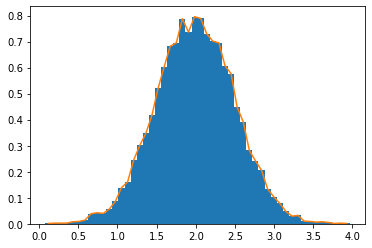

In [154]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rg.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=1)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)


With Matplotlib \>=3.4 you can also use `plt.stairs(n, bins)`.

## Further reading

-   The [Python tutorial](https://docs.python.org/tutorial/)
-   [reference](reference.ipynb)
-   [SciPy
    Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
-   [SciPy Lecture Notes](https://scipy-lectures.org)
-   A [matlab, R, IDL, NumPy/SciPy
    dictionary](http://mathesaurus.sf.net/)
-   `tutorial-svd`